## Observations and Insights 

### Observation 1:
Based on the data, it appears the drug trials were pretty fair with about the same number of mice tested in each drug regimen category, and about an equal ratio of male to female mice.

### Observation 2:
Looking at the boxplots of the final tumor volumes, Capomulin and Ramicane appear to be the most effective, but first, to cover all my bases, I would like to see a similar chart based on the initial tumor volumes for each drug category and compare those side by side to get a clearer idea of the before and after effect.

### Observation 3:
For the drug Capomulin, mouse weight and tumor volume are pretty highly correlated (0.84), so it seems reasonable to assume that weight loss may be be a side effect of that particular treatment regimen.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer' )

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_data['Is_duplicate'] = study_data.duplicated()
study_data.loc[study_data['Is_duplicate']==True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is_duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Remove all data associated with the duplicate mouse ID


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.drop(['Is_duplicate'], axis=1)
index_names = study_data[study_data['Mouse ID']=='g989'].index
study_data.drop(index_names, inplace = True)
study_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_data['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drugs_grouped = study_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
avg_tumor = drugs_grouped['Tumor Volume (mm3)'].mean()

med_tumor = drugs_grouped['Tumor Volume (mm3)'].median()

var_tumor = drugs_grouped['Tumor Volume (mm3)'].var()

std_tumor = drugs_grouped['Tumor Volume (mm3)'].std()

sem_tumor = drugs_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary = {'Mean (Tumor Vol.)': avg_tumor, 'Median (Tumor Vol.)': med_tumor,'Variance (Tumor Vol.)': var_tumor, 'Std Deviation (Tumor Vol.)': std_tumor, 'SEM': sem_tumor}

summary_df = pd.DataFrame(tumor_summary)
summary_df

,Mean (Tumor Vol.),Median (Tumor Vol.),Variance (Tumor Vol.),Std Deviation (Tumor Vol.),SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugs_grouped['Tumor Volume (mm3)'].describe()


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

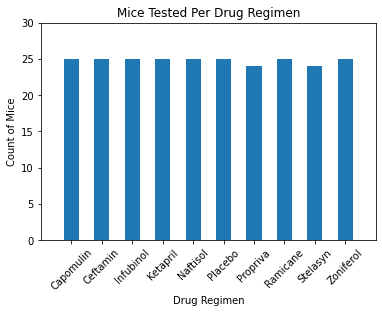

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Count of mice tested on each drug
mice_per_drug = drugs_grouped['Mouse ID'].nunique()

# Generate bar plot
mice_count_chart = mice_per_drug.plot(kind='bar')

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

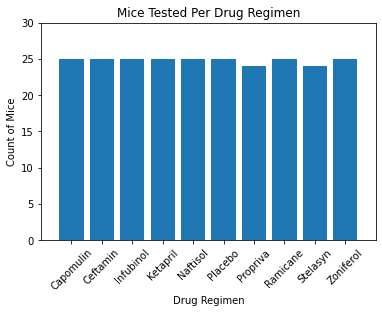

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# List of drugs
drugs = ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Generate bar plot
mice_count_pltchart = plt.bar(drugs, mice_per_drug)

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

Text(0, 0.5, '')

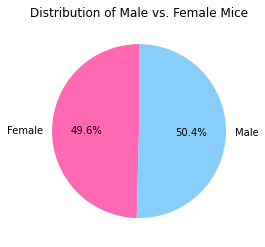

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
gender_grouped = study_data.groupby('Sex')

# Count every unique Mouse ID by gender
mice_gender = gender_grouped['Mouse ID'].nunique()

# Generate pie plot
colors = ['hotpink', 'lightskyblue']
mice_gender_chart = mice_gender.plot(kind='pie', colors=colors, autopct="%1.1f%%", startangle=90)

plt.title('Distribution of Male vs. Female Mice')
plt.ylabel('')

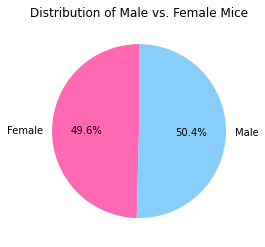

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, colors=colors,
        autopct="%1.1f%%", startangle=90, labels=['Female','Male'])
plt.title('Distribution of Male vs. Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tp_data = study_data.groupby('Mouse ID').max('Timepoint')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_data = pd.merge(study_data, final_tp_data, on=["Mouse ID", "Weight (g)", 'Age_months', 'Timepoint', "Metastatic Sites"], how="inner")

# Remove unneeded column
final_data = final_data.drop(["Tumor Volume (mm3)_y"], axis=1)

# Rename column
final_data = final_data.rename(columns = {'Tumor Volume (mm3)_x':'Tumor Volume (mm3)'})

# Sort values by treatment
final_data = final_data.sort_values(by='Drug Regimen')

# Filter for the four main treatment regimens
filtered_data = final_data[(final_data['Drug Regimen'] =='Capomulin') | (final_data['Drug Regimen'] == 'Ramicane') | (final_data['Drug Regimen'] =='Infubinol') | (final_data['Drug Regimen'] == 'Ceftamin')]

filtered_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,b742,Capomulin,Male,7,21,45,38.939633,0
45,i557,Capomulin,Female,1,24,45,47.685963,1
40,r944,Capomulin,Male,12,25,45,41.581521,2
39,l509,Capomulin,Male,17,21,45,41.483008,3
38,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
19,j989,Ramicane,Male,8,19,45,36.134852,1
21,a520,Ramicane,Male,13,21,45,38.810366,1
41,e662,Ramicane,Male,8,24,45,40.659006,2
26,q610,Ramicane,Female,18,21,35,36.561652,2


 Capomulin's potential outliers: []
 Ramicane's potential outliers: []
 Infubinol's potential outliers: [36.3213458]
 Ceftamin's potential outliers: []


 Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

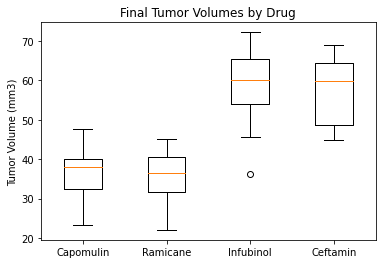

In [15]:
# Create drug list
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Declare variables for boxplots
fig, ax = plt.subplots()

# Locate the rows which contain mice on each drug and get the tumor volumes:
# First choose a drug to look up
for drug in four_drugs:
    tumor_data = filtered_data.loc[(filtered_data['Drug Regimen']==drug), 'Tumor Volume (mm3)']
    tumor_vol.append(tumor_data)
            
    # Calculate quartiles        
    quartiles = tumor_data.quantile([.25,.5,.75])
    
    # Calculate the IQR
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Calculate Upper & Lower bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine potential outliers
    outliers = tumor_data.loc[(tumor_data > upper_bound) | (tumor_data < lower_bound)]
    
    print(f" {drug}'s potential outliers: {outliers.values}")
    
# Create boxplots   
ax.set_title(f'Final Tumor Volumes by Drug')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol)
plt.setp(ax, xticks=[1, 2, 3, 4], xticklabels=four_drugs)
    

## Line and Scatter Plots

<ipython-input-16-aedf2c7af2e8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cap_s710_data = capomulin_data[(study_data['Mouse ID'] =='l509')]


Text(0, 0.5, 'Tumor Volume (mm3)')

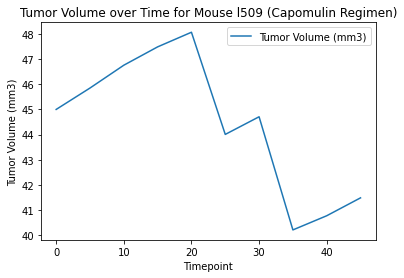

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = study_data[(study_data['Drug Regimen'] =='Capomulin')]

cap_s710_data = capomulin_data[(study_data['Mouse ID'] =='l509')]

cap_s710_data.plot(kind ='line', x = 'Timepoint', y = 'Tumor Volume (mm3)')

plt.title('Tumor Volume over Time for Mouse l509 (Capomulin Regimen)')
plt.ylabel('Tumor Volume (mm3)')

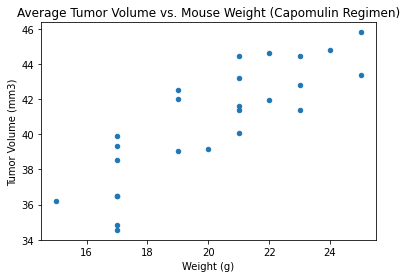

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_cap = capomulin_data.groupby('Mouse ID')

cap_avg_data = grouped_cap.agg({'Tumor Volume (mm3)':'mean', 'Weight (g)':'mean'})

# Plot
cap_avg_data.plot(kind='scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')

plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694717
y = 0.96x + 21.49


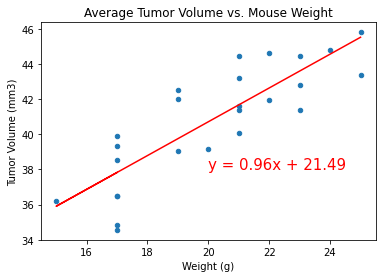

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_data
weight = capomulin_data.iloc[:, 4]
tumor = capomulin_data.iloc[:, 6]

# print correlation coefficient
Corr = cap_avg_data['Weight (g)'].corr(cap_avg_data['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {Corr}')

# Line calculation
slope, intercept, rvalues, pvalues, std_err = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line on scatter chart
cap_avg_data.plot(kind='scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight")
